In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install -U google-genai

In [4]:
!pip install Pillow

Image(
  image_bytes=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x02\x00\x00\x00\xf0\x7f\xbc\xd4\x00\x00 \x00IDATx\xda\xa4\xbd\x89r\xe3\xba\xb2-h\x0e\xe0\x80\x89\xa4d\xd7>\xe7\xde\xee\xfe\xff\xcfl\xe4\x88\x04H\xb9\xf6\xeb\x8e@\xa8(\x8a\xa2d[E\xad\xcc\\\xc3\xd7\xe6'\x1f&\xef\xe7\xdd\xcf\x1e...',
  mime_type='image/png'
)

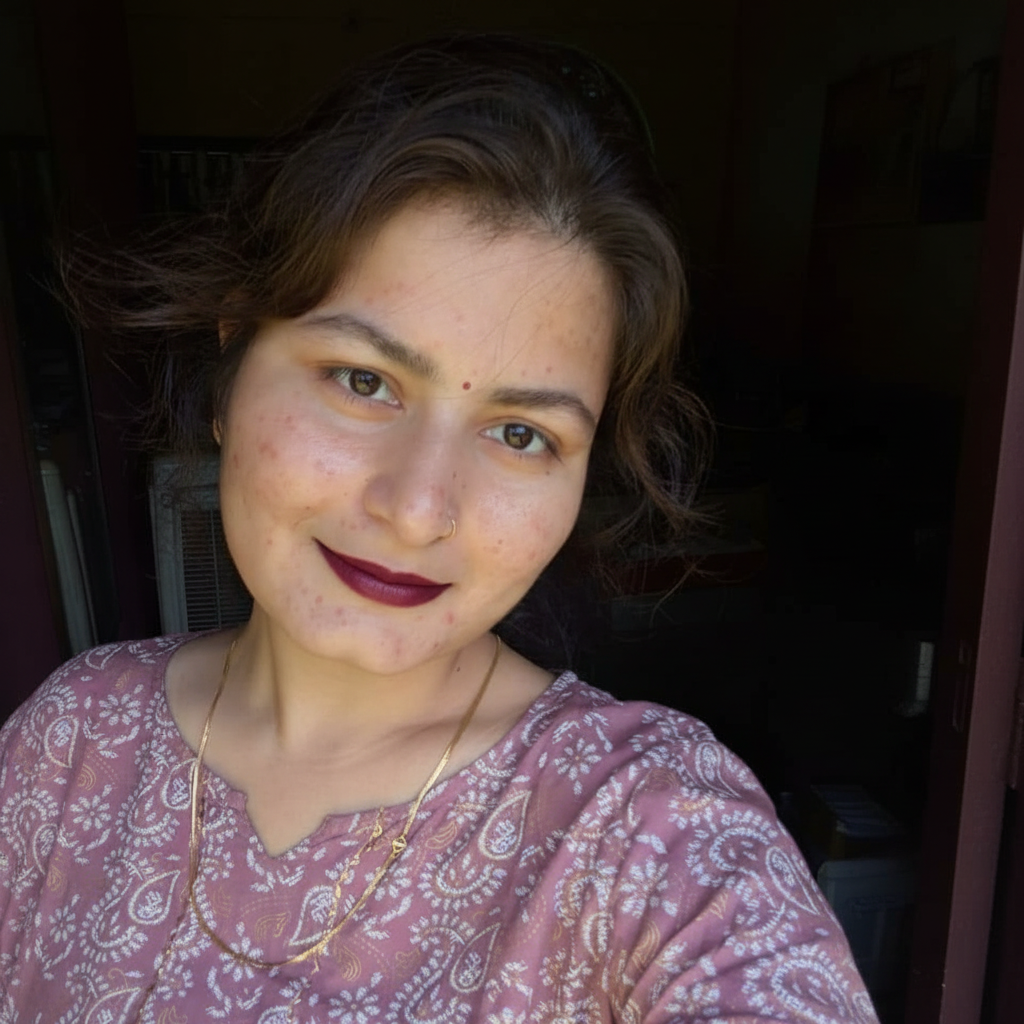

In [4]:
import os
from google import genai
from google.genai import types
import PIL
from IPython.display import display, Markdown

API_KEY = os.getenv("GOOGLE_API_KEY")
if not API_KEY:
    raise ValueError("GOOGLE_API_KEY is not set. Add it to environment or Kaggle Secrets.")

client = genai.Client(api_key=API_KEY)

# ===== UTILS =====
def display_response(response):
    for part in response.parts:
        if part.text:
            display(Markdown(part.text))
        elif (image := part.as_image()):
            display(image)

def save_image(response, path):
    for part in response.parts:
        if (image := part.as_image()):
            image.save(path)

# ===== INPUT IMAGES =====
person = PIL.Image.open("/kaggle/input/data-for-banana-hackathon/person.jpeg")
product = PIL.Image.open("/kaggle/input/data-for-banana-hackathon/product.png")

# ===== PROMPT =====
prompt = "Overlay the product onto the person so it looks like they are wearing it naturally."

#gemini model using
response = client.models.generate_content(
    model="gemini-2.5-flash-image-preview",  
    contents=[
        prompt,
        person,
        product
    ],
    config=types.GenerateContentConfig(
        response_modalities=["TEXT", "IMAGE"]
    )
)

# ===== OUTPUT =====
display_response(response)
save_image(response, "tryon_result.png")

from PIL import Image
display(Image.open("tryon_result.png"))

✅ Saved: tryon_1.png


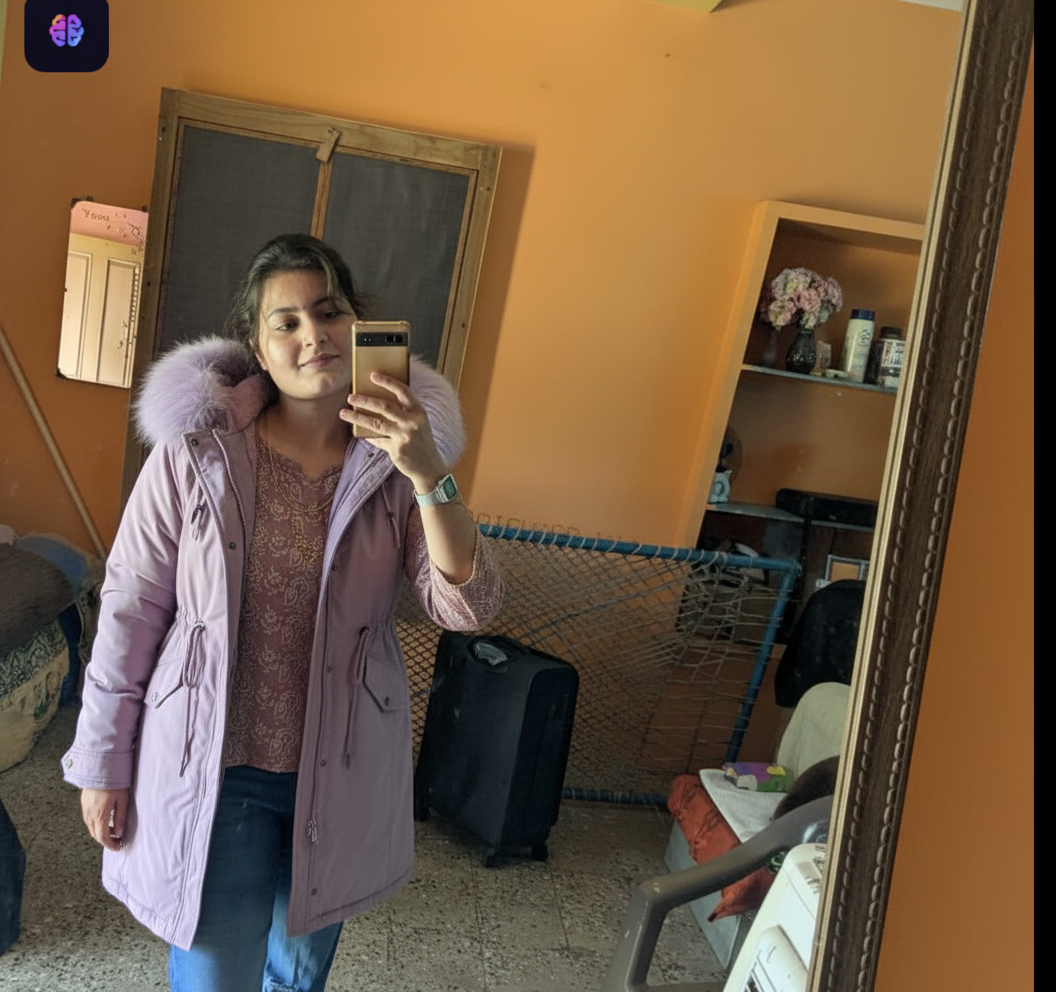

In [5]:
import PIL
from IPython.display import display

# ===== Person image =====
person_file = "person2.jpeg"
person = PIL.Image.open(f"/kaggle/input/data-for-banana-hackathon/{person_file}")

# ===== Product images =====
products = [
    "jacket1.png"
]

# ===== Loop through products only =====
for prod_idx, prod in enumerate(products, start=1):
    product = PIL.Image.open(f"/kaggle/input/data-for-banana-hackathon/{prod}")
    
    prompt = f"Make the person in {person_file} wear this clothing item ({prod}) naturally aligned to their body."

    
    response = client.models.generate_content(
        model="gemini-2.5-flash-image-preview",
        contents=[prompt, person, product],
        config=types.GenerateContentConfig(
            response_modalities=["TEXT", "IMAGE"]
        )
    )
    
    output_file = f"tryon_{prod_idx}.png"
    save_image(response, output_file)
    
    print(f"✅ Saved: {output_file}")
    display(PIL.Image.open(output_file))  


✅ Saved: tryon_1.png


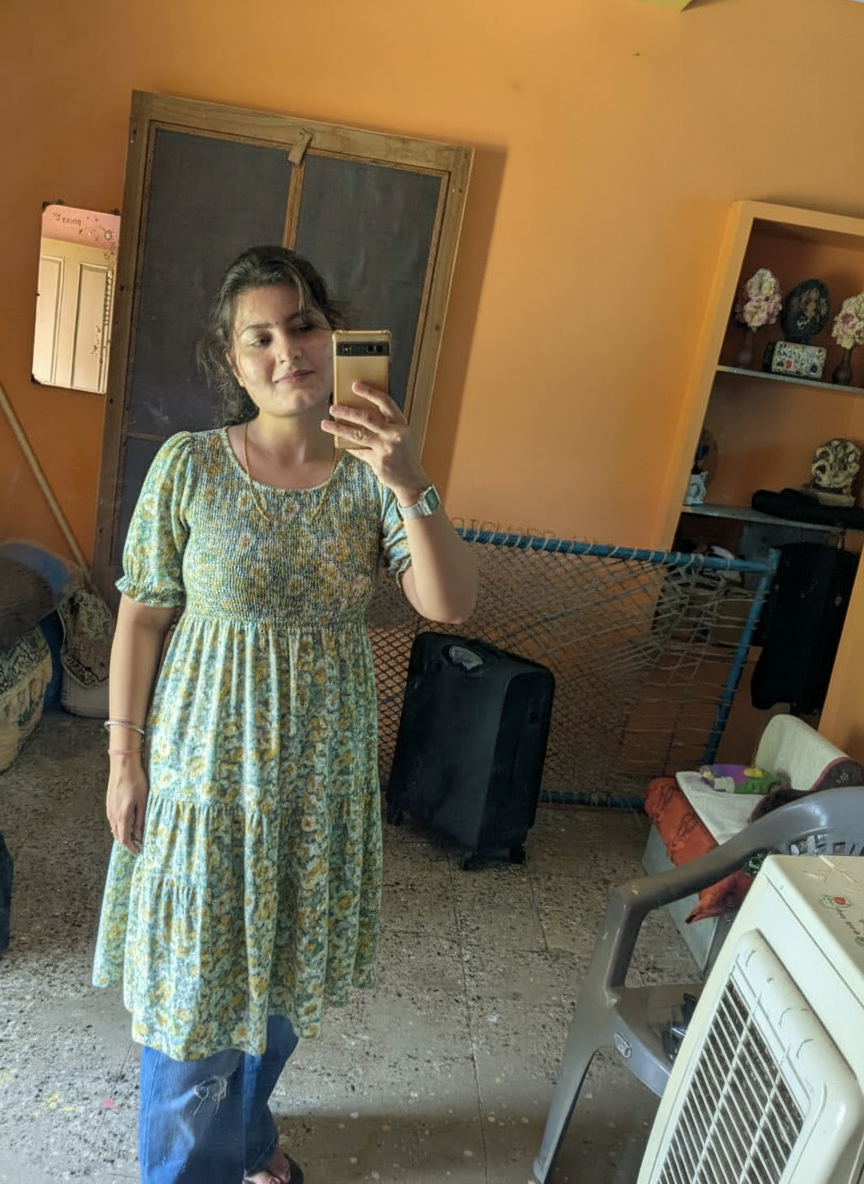

In [6]:
import PIL
from IPython.display import display

# ===== Person image =====
person_file = "person2.jpeg"
person = PIL.Image.open(f"/kaggle/input/data-for-banana-hackathon/{person_file}")

# ===== Product images =====
products = [
    "dress3.png"
]

# ===== Loop through products only =====
for prod_idx, prod in enumerate(products, start=1):
    product = PIL.Image.open(f"/kaggle/input/data-for-banana-hackathon/{prod}")
    
    prompt =f"Overlay the dress image ({prod}) onto the person ({person_file}) so that it looks realistic: correct size, natural folds, aligned to torso, arms, and shoulders. Keep the background unchanged."


    
    response = client.models.generate_content(
        model="gemini-2.5-flash-image-preview",
        contents=[prompt, person, product],
        config=types.GenerateContentConfig(
            response_modalities=["TEXT", "IMAGE"]
        )
    )
    
    output_file = f"tryon_{prod_idx}.png"
    save_image(response, output_file)
    
    print(f"✅ Saved: {output_file}")
    display(PIL.Image.open(output_file))